This code has been influenced by Eu Jin Lok: https://www.kaggle.com/ejlok1. There work influenced the MFCC code (which changes the audio files into cepstral coefficients) and the neural network, a look at the emotionalClass.ipynb can provide a view into their work. The rest of the  implementation was completed by myself

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import json
import pickle
import time

#import torch
#import torch.nn as nn
#import torch.nn.functional as F
#import torchaudio
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import numpy as np
import pandas as pd

import glob
import librosa
import librosa.display
import IPython.display as ipd

    

import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint


import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Using TensorFlow backend.


Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7



In [0]:
import os

In [0]:
dirList = os.listdir(tst)
#vFeaturedDF = pd.read_csv("importFile.csv")

The following code was run locally and then a csv file was used to transport the contents of the file, which was run here. This was done as Google Drive does not allow for files larger than 15GB

In [0]:
# meta_first = pd.read_csv("http://www.robots.ox.ac.uk/~vgg/data/voxceleb/meta/iden_split.txt", sep=" ")
# #meta_first.head()
# meta_first[['id10003','na8-QEFmj44','00003.wav']] = meta_first['id10003/na8-QEFmj44/00003.wav'].str.split('/',expand=True)
# meta = meta_first.drop(['id10003/na8-QEFmj44/00003.wav'], axis=1)

# #meta.columns = ['num', 'id', 'file', 'wav_file']
# meta.head()
# meta.shape
# display(meta)

# VOX = "vox1/wav/"

# # Run one example 
# dir_list = os.listdir(VOX)
# #print((dir_list))

# path = []
# path_id = []
# for index, i in enumerate(dir_list):
#     temp_dir_list = os.listdir(VOX + i)
#     for j in range(len(temp_dir_list)):
#         temp_Vox = VOX + i + "/" + str(temp_dir_list[j])
#         dir_temp_Vox = os.listdir(temp_Vox)
#         for index, k in enumerate(dir_temp_Vox):
#             final_Vox = temp_Vox + "/" + k # + str(dir_temp_Vox[index])
#             path.append(final_Vox)
#             path_id.append(i)

# print(path[76])
# print(len(path))
# print(path_id[76])
# pathDF = pd.DataFrame(path, columns=["Path"])
# pathIDDF = pd.DataFrame(path_id, columns=["VoxCeleb1 ID"])
# display(pathDF.head())
# print(pathDF.shape)
# display(pathIDDF.head())
# print(pathIDDF.shape)

# finalDF = pd.concat([pathDF, pathIDDF], axis=1)
# display(finalDF)

# id_meta = pd.read_csv("vox1_meta.csv", sep = '\t')
# display(id_meta.head())
# # lets pick up the meta-data that we got from our first part of the Kernel
# #ref = pd.read_csv("")
# #ref.head()

# totalDF = pd.merge(id_meta, finalDF, how="right", on="VoxCeleb1 ID")

# display(totalDF)

# test = totalDF["Path"].iloc[0]
# data, sampling_rate = librosa.load(test)
# print("Shape of waveform {}".format(data.shape))
# print("Sampling Rate: {}".format(sampling_rate))
# plt.figure(figsize=(15, 5))
# librosa.display.waveplot(data, sr=sampling_rate)

# print("This person is: {}".format(totalDF["VGGFace1 ID"].iloc[0]))
# ipd.Audio(test)

# test1 = totalDF["Path"].iloc[100000]
# data, sampling_rate = librosa.load(test1)
# print("Shape of waveform {}".format(data.shape))
# print("Sampling Rate: {}".format(sampling_rate))
# plt.figure(figsize=(15, 5))
# librosa.display.waveplot(data, sr=sampling_rate)

# print("This person is: {}".format(totalDF["VGGFace1 ID"].iloc[100000]))
# ipd.Audio(test1)

# test2 = totalDF["Path"].iloc[148641]
# data, sampling_rate = librosa.load(test2)
# print("Shape of waveform {}".format(data.shape))
# print("Sampling Rate: {}".format(sampling_rate))
# plt.figure(figsize=(15, 5))
# librosa.display.waveplot(data, sr=sampling_rate)

# print("This person is: {}".format(totalDF["VGGFace1 ID"].iloc[148641]))
# ipd.Audio(test2)

# # Source - RAVDESS; Gender - Female; Emotion - Angry 
# #Actor_14/03-01-06-02-02-02-14.wav
# path = test
# X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
# male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
# male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)

# # Source - RAVDESS; Gender - Male; Emotion - Angry 
# path = test1
# X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
# female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
# female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)

# # audio wave
# plt.figure(figsize=(20, 15))
# plt.subplot(3,1,1)
# plt.plot(female, label='female')
# plt.plot(male, label='male')
# plt.title("Pitch comparison of Female to Man Utterances")
# plt.legend()

# print(totalDF.shape)
# voxDF = totalDF.sample(frac=0.2)
# print(voxDF.shape)
# display(voxDF)
# voxDF = voxDF.reset_index(drop = True)
# display(voxDF)

# # Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets
# start = time.time()
# df = pd.DataFrame(columns=['feature'])
# df_ID = []
# df_ID = voxDF['VoxCeleb1 ID'].tolist()
# new_df_ID = pd.DataFrame(df_ID, columns=["VoxCeleb1 ID"])
# #display(new_df_ID)

# # loop feature extraction over the entire dataset
# counter=0
# for index,path in enumerate(voxDF["Path"]):
    
#     X, sample_rate = librosa.load(path
#                                   , res_type='kaiser_fast'
#                                   ,duration=2.5
#                                   ,sr=44100
#                                   ,offset=0.5
#                                  )
#     sample_rate = np.array(sample_rate)
    
#     # mean as the feature. Could do min and max etc as well. 
#     mfccs = np.mean(librosa.feature.mfcc(y=X, 
#                                         sr=sample_rate, 
#                                         n_mfcc=13),
#                     axis=0)
#     df.loc[counter] = [mfccs]
#     counter=counter+1
# #    df_ID.append()

# # Check a few records to make sure its processed successfully
# end = time.time()
# print("This process took: {}".format(end-start))
# print(len(df))

# df.head()

# maintain_df = df
# maintain_new_df_ID = new_df_ID
# maintainVOX = voxDF
# #print(new_df_ID.head())
# #print(df.head())
# #print(type(new_df_ID))
# #print(type(df))
# df = pd.DataFrame(df['feature'].values.tolist())
# display(df)

# #df = pd.DataFrame(df['feature'].values.tolist())
# #display(df)
# #tmpry_df = pd.concat([new_df_ID, df], axis=1)
# #tmpry_df = tmpry_df.drop(columns=["VoxCeleb1 ID"])
# vFeaturedf = pd.concat([voxDF, tmpry_df], axis=1)
# #display(tmpry_df)
# #print(tmpry_df.shape)
# display(vFeaturedf)
# print(vFeaturedf.shape)

# vFeaturedf.to_csv("importFile.csv")

In [0]:
print(dirList)
vFeaturedDF = pd.read_csv("/content/drive/My Drive/Google_CoLab/importFile.csv")
#display(vFeaturedDF)
vFeaturedDF = vFeaturedDF.drop(columns=["Unnamed: 0"])
display(vFeaturedDF)

['ravdess-emotional-speech-audio', 'importFile.csv', 'emotionalClass.ipynb', 'creditcard.csv', 'digit-recognizer', 'MNIST.ipynb', 'celebClass.ipynb']


,VoxCeleb1 ID,VGGFace1 ID,Gender,Nationality,Set,Path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
0,id10148,Cher,f,USA,dev,vox1/wav/id10148/nqDj3Sa7IOA/00006.wav,-39.084332,-38.774715,-39.412785,-37.838284,-36.620743,-38.415066,-38.013741,-36.695793,-35.436161,-35.700680,-36.109066,-35.621269,-34.374374,-34.099232,-33.142784,-34.426178,-35.383018,-35.136665,-34.976341,-35.657520,-37.156998,-37.421368,-36.454876,-36.235832,-31.997023,-32.164326,-35.223244,-35.547287,-34.531296,-28.810183,-28.469309,-28.762024,-30.130341,-29.397127,...,-28.613216,-28.801474,-28.063749,-26.368156,-25.071659,-25.777273,-29.116825,-29.318144,-31.602476,-31.984276,-31.368061,-28.257030,-28.651873,-31.549520,-30.692207,-28.895426,-28.918182,-31.602505,-30.470512,-30.002031,-28.310240,-25.921978,-24.212780,-23.396858,-22.125166,-22.615822,-23.904274,-24.181395,-25.896786,-27.613808,-29.764452,-30.949585,-31.546833,-33.069405,-30.742588,-31.605370,-31.269579,-28.719170,-23.061232,-16.707037
1,id10754,Mark_Ruffalo,m,USA,dev,vox1/wav/id10754/TKQ2eU8u-TE/00037.wav,-18.954767,-23.183409,-30.713772,-29.696774,-30.475952,-33.860123,-34.375164,-35.555153,-36.590916,-35.531807,-36.799721,-34.829659,-34.037231,-32.497559,-32.560474,-31.655722,-34.206425,-34.859047,-34.725658,-34.809315,-34.678497,-33.941517,-32.377827,-33.499992,-33.788265,-34.961128,-35.185127,-34.383381,-35.276749,-33.957077,-33.834091,-32.894516,-32.095890,-31.879650,...,-31.620394,-31.260721,-32.140495,-32.066147,-31.938982,-32.037174,-31.713942,-31.659443,-32.498531,-32.160995,-31.923065,-31.193399,-29.058218,-30.075167,-31.085510,-29.476013,-30.615627,-32.301506,-33.769981,-35.183632,-34.766891,-34.664757,-34.695904,-36.248177,-36.531555,-36.902779,-37.187790,-35.019302,-35.173664,-35.706306,-30.229296,-27.468458,-29.250439,-31.142649,-35.066822,-37.960968,-37.007633,-35.129852,-35.815083,-35.949669
2,id10792,Melissa_Peterman,f,USA,dev,vox1/wav/id10792/Le5l1YzamlE/00005.wav,-10.220867,-12.874949,-18.146616,-19.031492,-20.299282,-24.549501,-25.149689,-24.053413,-21.650217,-20.406752,-20.303307,-18.531887,-19.105064,-19.621582,-19.973925,-17.645548,-17.672619,-18.719593,-20.525743,-21.690603,-22.298971,-22.018856,-21.533140,-20.695169,-21.602385,-22.627958,-22.400806,-22.943180,-22.087231,-21.273457,-20.113125,-20.394533,-23.441008,-25.416994,...,-18.909826,-18.956059,-19.389551,-18.179758,-17.444258,-16.366083,-17.624567,-19.110508,-20.337055,-21.803612,-24.432499,-25.572380,-23.108425,-23.706593,-22.043814,-10.764855,-8.617176,-11.999956,-15.812032,-15.386130,-16.280148,-16.058586,-16.435572,-15.390551,-15.720430,-14.088378,-14.694490,-17.430391,-20.117561,-17.774822,-17.381620,-20.267368,-22.260048,-21.501675,-21.756762,-23.595089,-23.940563,-24.121336,-21.646410,-14.159225
3,id10232,Demian_Bichir,m,Mexico,dev,vox1/wav/id10232/tKHrYEGlQtU/00002.wav,-7.553899,-5.370308,-5.288743,-5.895661,-6.347616,-4.556597,-3.582651,-3.225121,-4.872769,-7.691215,-9.566206,-5.705196,-4.431314,-5.696429,-7.055916,-6.906463,-7.156705,-5.063367,-5.219178,-5.444305,-5.080812,-3.372691,-4.566031,-1.440652,-0.095585,-2.772486,-0.298033,-1.814653,-5.860996,-7.342319,-7.448239,-4.806811,-5.860236,-5.979056,...,-10.190138,-8.160536,-6.766572,-5.998154,-2.263613,-0.073956,0.052975,-4.057250,-6.041040,-5.934546,-4.428474,-1.803684,-1.521237,-0.494986,-1.487251,-1.018441,2.317007,3.341901,3.467000,2.821538,2.770611,1.881162,1.161542,3.092388,3.236010,1.581948,-0.500576,-1.481272,-0.641414,-0.536081,-2.145181,-5.030901,-3.210368,-3.590342,-4.104300,-3.223685,-4.656690,-2.166901,-0.629226,-1.635288
4,id10362,Harry_Connick_Jr.,m,USA,dev,vox1/wav/id10362/fNJ7ttOFOkI/00001.wav,-17.452457,-18.525185,-20.450596,-20.087667,-21.122538,-20.537991,-19.558683,-18.753258,-18.555910,-19.058018,-20.503273,-20.974607,-21.23

In [0]:
lb = LabelEncoder()
vFeaturedDF["Nationality"] = lb.fit_transform(vFeaturedDF['Nationality'])
# np_utils.to_categorical(lb.fit_transform(y_train))
#y_test = lb.fit_transform(y_test)# np_utils.to_categorical(lb.fit_transform(y_test))
#vFeaturedDF["Nationality"]
print(lb.classes_)
display(vFeaturedDF)

['Australia' 'Austria' 'Brazil' 'Canada' 'Chile' 'China' 'Croatia'
 'Denmark' 'Germany' 'Guyana' 'India' 'Iran' 'Ireland' 'Israel' 'Italy'
 'Mexico' 'Netherlands' 'New Zealand' 'Norway' 'Pakistan' 'Philippines'
 'Poland' 'Portugal' 'Russia' 'Singapore' 'South Africa' 'South Korea'
 'Spain' 'Sri Lanka' 'Sudan' 'Sweden' 'Switzerland' 'Trinidad and Tobago'
 'UK' 'USA']


,VoxCeleb1 ID,VGGFace1 ID,Gender,Nationality,Set,Path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
0,id10148,147,f,34,dev,vox1/wav/id10148/nqDj3Sa7IOA/00006.wav,-39.084332,-38.774715,-39.412785,-37.838284,-36.620743,-38.415066,-38.013741,-36.695793,-35.436161,-35.700680,-36.109066,-35.621269,-34.374374,-34.099232,-33.142784,-34.426178,-35.383018,-35.136665,-34.976341,-35.657520,-37.156998,-37.421368,-36.454876,-36.235832,-31.997023,-32.164326,-35.223244,-35.547287,-34.531296,-28.810183,-28.469309,-28.762024,-30.130341,-29.397127,...,-28.613216,-28.801474,-28.063749,-26.368156,-25.071659,-25.777273,-29.116825,-29.318144,-31.602476,-31.984276,-31.368061,-28.257030,-28.651873,-31.549520,-30.692207,-28.895426,-28.918182,-31.602505,-30.470512,-30.002031,-28.310240,-25.921978,-24.212780,-23.396858,-22.125166,-22.615822,-23.904274,-24.181395,-25.896786,-27.613808,-29.764452,-30.949585,-31.546833,-33.069405,-30.742588,-31.605370,-31.269579,-28.719170,-23.061232,-16.707037
1,id10754,713,m,34,dev,vox1/wav/id10754/TKQ2eU8u-TE/00037.wav,-18.954767,-23.183409,-30.713772,-29.696774,-30.475952,-33.860123,-34.375164,-35.555153,-36.590916,-35.531807,-36.799721,-34.829659,-34.037231,-32.497559,-32.560474,-31.655722,-34.206425,-34.859047,-34.725658,-34.809315,-34.678497,-33.941517,-32.377827,-33.499992,-33.788265,-34.961128,-35.185127,-34.383381,-35.276749,-33.957077,-33.834091,-32.894516,-32.095890,-31.879650,...,-31.620394,-31.260721,-32.140495,-32.066147,-31.938982,-32.037174,-31.713942,-31.659443,-32.498531,-32.160995,-31.923065,-31.193399,-29.058218,-30.075167,-31.085510,-29.476013,-30.615627,-32.301506,-33.769981,-35.183632,-34.766891,-34.664757,-34.695904,-36.248177,-36.531555,-36.902779,-37.187790,-35.019302,-35.173664,-35.706306,-30.229296,-27.468458,-29.250439,-31.142649,-35.066822,-37.960968,-37.007633,-35.129852,-35.815083,-35.949669
2,id10792,751,f,34,dev,vox1/wav/id10792/Le5l1YzamlE/00005.wav,-10.220867,-12.874949,-18.146616,-19.031492,-20.299282,-24.549501,-25.149689,-24.053413,-21.650217,-20.406752,-20.303307,-18.531887,-19.105064,-19.621582,-19.973925,-17.645548,-17.672619,-18.719593,-20.525743,-21.690603,-22.298971,-22.018856,-21.533140,-20.695169,-21.602385,-22.627958,-22.400806,-22.943180,-22.087231,-21.273457,-20.113125,-20.394533,-23.441008,-25.416994,...,-18.909826,-18.956059,-19.389551,-18.179758,-17.444258,-16.366083,-17.624567,-19.110508,-20.337055,-21.803612,-24.432499,-25.572380,-23.108425,-23.706593,-22.043814,-10.764855,-8.617176,-11.999956,-15.812032,-15.386130,-16.280148,-16.058586,-16.435572,-15.390551,-15.720430,-14.088378,-14.694490,-17.430391,-20.117561,-17.774822,-17.381620,-20.267368,-22.260048,-21.501675,-21.756762,-23.595089,-23.940563,-24.121336,-21.646410,-14.159225
3,id10232,231,m,15,dev,vox1/wav/id10232/tKHrYEGlQtU/00002.wav,-7.553899,-5.370308,-5.288743,-5.895661,-6.347616,-4.556597,-3.582651,-3.225121,-4.872769,-7.691215,-9.566206,-5.705196,-4.431314,-5.696429,-7.055916,-6.906463,-7.156705,-5.063367,-5.219178,-5.444305,-5.080812,-3.372691,-4.566031,-1.440652,-0.095585,-2.772486,-0.298033,-1.814653,-5.860996,-7.342319,-7.448239,-4.806811,-5.860236,-5.979056,...,-10.190138,-8.160536,-6.766572,-5.998154,-2.263613,-0.073956,0.052975,-4.057250,-6.041040,-5.934546,-4.428474,-1.803684,-1.521237,-0.494986,-1.487251,-1.018441,2.317007,3.341901,3.467000,2.821538,2.770611,1.881162,1.161542,3.092388,3.236010,1.581948,-0.500576,-1.481272,-0.641414,-0.536081,-2.145181,-5.030901,-3.210368,-3.590342,-4.104300,-3.223685,-4.656690,-2.166901,-0.629226,-1.635288
4,id10362,321,m,34,dev,vox1/wav/id10362/fNJ7ttOFOkI/00001.wav,-17.452457,-18.525185,-20.450596,-20.087667,-21.122538,-20.537991,-19.558683,-18.753258,-18.555910,-19.058018,-20.503273,-20.974607,-21.233540,-19.998505,-18.734747,-18.876621,-19.783466,-20.07

In [0]:
start = time.time()
x_train, x_test, y_train, y_test = train_test_split(vFeaturedDF.drop(['VoxCeleb1 ID', 'VGGFace1 ID', 'Gender', 'Nationality', 'Set', 'Path'], axis = 1),
                                                    vFeaturedDF["Nationality"], test_size = 0.1, shuffle = True, random_state = 42)
#display(x_train[100:110])
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean)/std
x_test = (x_test - mean)/std # One normalizes their test to the same mean and standard deviation as training
end = time.time()
print("The time it took: {}".format(end - start))
display(x_train[100:110])
print(x_train.shape)

The time it took: 0.4758918285369873


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
12922,0.352164,0.354562,0.519917,0.613624,0.623550,0.191584,0.272758,0.601602,0.727125,0.621279,0.663539,0.616285,0.517433,0.671778,0.631511,0.601655,0.466468,0.545104,0.772493,0.647987,0.333112,0.185631,0.104611,-0.092150,-0.082708,-0.028062,-0.034349,0.043229,-0.010231,-0.291473,-0.365096,-0.513558,-0.436966,-0.266189,-0.379925,-0.243337,-0.407317,-0.187596,0.112934,0.215872,...,-1.381218,-0.108356,0.679628,0.911645,0.962626,0.782235,0.242072,-0.329461,-0.954903,-1.085926,-0.734898,-0.215521,0.249306,1.194400,1.354944,1.008256,0.786075,0.607348,0.594327,0.229565,-0.084455,-0.754367,-1.444674,-1.615437,-1.617732,-1.444068,-1.250105,-1.202825,-0.490069,0.242891,0.861446,1.214458,1.152255,0.817447,0.656331,0.687587,0.634010,0.773686,0.866445,1.002340
22262,-1.865721,-2.153063,-2.211994,-2.106313,-2.026603,-1.858762,-2.112030,-2.459001,-2.361435,-2.325112,-2.344513,-2.358449,-2.030305,-2.133582,-2.501432,-2.489742,-2.339126,-2.325509,-2.351119,-2.422064,-2.614837,-2.759465,-3.032252,-2.854313,-2.741910,-2.709053,-2.770249,-2.720041,-2.330500,-1.601636,-1.130137,-1.066100,-1.215188,-1.198872,-1.265140,-1.293417,-1.477505,-1.429380,-1.372829,-1.531791,...,-1.591217,-1.487081,-1.532991,-1.509619,-1.367637,-1.267237,-1.301121,-1.633636,-1.965119,-2.096862,-2.209507,-2.027043,-2.115122,-2.219007,-2.051508,-2.292866,-2.418689,-2.130249,-1.821027,-1.750409,-1.465427,-1.544870,-2.355928,-2.450934,-2.505810,-2.354399,-2.403647,-2.320408,-2.266216,-2.470323,-2.493020,-2.434213,-2.695678,-2.501239,-2.275716,-2.313838,-1.874573,-1.921422,-2.215995,-2.272207
2221,0.669452,0.550550,0.443265,0.417081,0.595194,0.634835,0.687832,0.664844,0.516393,0.514851,0.507472,0.509539,0.296138,0.336176,0.362456,0.143340,-0.019521,0.302383,0.392520,0.134295,0.080364,0.041802,0.058693,-0.105739,0.041636,0.006017,-0.048184,0.101507,0.027283,-0.026289,0.046313,0.191865,0.221148,0.330406,0.489659,0.569434,0.487480,0.543518,0.406798,0.431725,...,0.172318,0.156068,0.201653,0.354728,0.365554,0.463730,0.424723,0.639483,0.648049,0.562816,0.620716,0.638464,0.765612,0.631491,0.555782,0.378251,0.188072,0.320379,0.348825,0.251567,0.100179,0.169472,0.269353,0.339408,0.218716,0.074285,-0.165375,0.219237,0.368479,0.208604,0.216047,0.226393,0.378846,0.377026,0.392625,0.212833,0.418452,0.572367,0.537090,0.595700
12784,0.013525,0.114180,0.218954,0.306965,0.421820,0.354971,0.320722,0.473840,0.454786,0.441816,0.583423,0.158541,0.079396,0.153937,0.002478,-0.088521,0.247036,0.038914,0.063645,0.228227,0.391639,0.446522,0.630711,0.564969,0.606981,0.494903,0.502284,0.464535,0.281341,0.282305,0.449265,0.379064,0.314390,0.308755,0.126641,0.079109,-0.046054,-0.175142,-0.078897,0.063252,...,-0.427647,-0.140177,-0.059206,-0.314690,-0.281214,-0.195048,0.062022,0.123056,-0.123805,-0.339668,-0.277481,-0.129046,0.039743,-0.171485,-0.098369,0.181181,0.277257,0.330410,0.338720,0.416324,0.595272,0.473162,0.584096,0.585478,0.488123,0.458982,0.304907,0.311840,0.407436,0.187482,0.111473,0.026014,-0.227177,-0.167354,0.222671,0.094772,0.290255,0.350717,-0.247618,-0.284185
21130,0.150197,-0.102691,-0.253805,-0.421368,-0.261097,0.077171,0.496686,0.492068,0.087980,-0.147961,-0.227236,-0.367443,-0.459522,-0.456511,-0.966194,-1.214825,-1.159539,-0.961246,-0.741442,-0.592348,-0.564971,-0.809529,-1.090171,-0.916698,-0.912935,-0.649874,-0.377753,-0.853960,-1.037771,-0.572580,-0.398705,-0.495322,-0.468830,-0.495176,-0.795418,-0.665494,-0.363206,-0.312943,-0.578052,-0.601065,...,-0.212453,-0.100765,-0.548671,-0.810736,-1.250482,-1.601808,-1.597853,-1.397885,-1.636947,-1.822859,-1.949105,-1.798525,-1.792591,-2.176556,-1.989908,-1.359416,-0.653946,-0.734329,-0.829780,-0.760442,-1.029828,-0.854677,-0.598418,-0.794001,-0.752235,-0.727955,-0.703

(26755, 216)


In [0]:
all_names = vFeaturedDF["Nationality"].unique().size
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

lb = LabelEncoder()
#y_train = lb.fit_transform(y_train)# np_utils.to_categorical(lb.fit_transform(y_train))
#y_test = lb.fit_transform(y_test)# np_utils.to_categorical(lb.fit_transform(y_test))

print(x_train.shape)
display(y_train)
#print(lb.classes_)

filename = 'labelsVox'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()
#display(y_train)

(26755, 216)


array([33, 34, 34, ..., 16, 33, 34])

In [0]:
x_train = np.expand_dims(x_train, axis = 2)
x_test = np.expand_dims(x_test, axis = 2)
#x_train = np.squeeze(x_train)
#x_test = np.squeeze(x_test)
print(x_train.shape)
print(x_test.shape)

(26755, 216, 1)
(2973, 216, 1)


In [0]:
# #from keras.models import Sequential
# #from keras.layers.convolutional import Conv2D
# #from keras.layers.convolutional_recurrent import ConvLSTM2D, ConvLSTM1D
# #from keras.layers.normalization import BatchNormalization
# #import numpy as np
# #import pylab as plt
# from keras.applications import VGG16, VGG19

In [0]:
keras.backend.clear_session()
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(x_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(all_names)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
opt = keras.optimizers.Adam(lr=0.0001)
#opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          2304      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 216, 256)          1024      
_________________________________________________________________
activation_2 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 256)          

In [0]:
# from keras.utils import plot_model
# from keras.utils import model_to_dot
# from IPython.display import SVG
# plot_model(model, show_shapes=True, dpi = 96)

In [0]:
# plot_model(model, show_shapes=True, dpi = 96)
# #SVG(model_to_dot(model).create(prog="dot", format="svg"))

In [0]:
start = time.time()
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(x_train, y_train, batch_size=50, epochs=100, validation_data=(x_test, y_test))
end = time.time()
print("The time it took to complete training was: {}".format(end - start))

Train on 26755 samples, validate on 2973 samples
Epoch 1/100
26755/26755 [==============================] - 25s 928us/step - loss: 1.5003 - acc: 0.6146 - val_loss: 1.5469 - val_acc: 0.6317
Epoch 2/100
26755/26755 [==============================] - 24s 881us/step - loss: 1.4421 - acc: 0.6183 - val_loss: 1.5285 - val_acc: 0.6317
Epoch 3/100
26755/26755 [==============================] - 24s 879us/step - loss: 1.4353 - acc: 0.6185 - val_loss: 1.4606 - val_acc: 0.6317
Epoch 4/100
26755/26755 [==============================] - 24s 885us/step - loss: 1.4328 - acc: 0.6184 - val_loss: 1.4592 - val_acc: 0.6317
Epoch 5/100
26755/26755 [==============================] - 24s 879us/step - loss: 1.4298 - acc: 0.6187 - val_loss: 1.4907 - val_acc: 0.6324
Epoch 6/100
26755/26755 [==============================] - 24s 882us/step - loss: 1.4264 - acc: 0.6184 - val_loss: 1.4746 - val_acc: 0.6317
Epoch 7/100
26755/26755 [==============================] - 24s 881us/step - loss: 1.4231 - acc: 0.6185 - val_lo

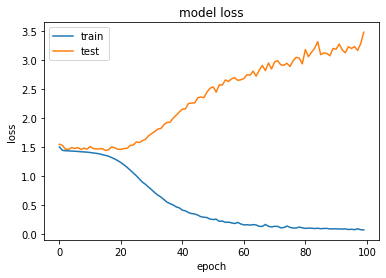

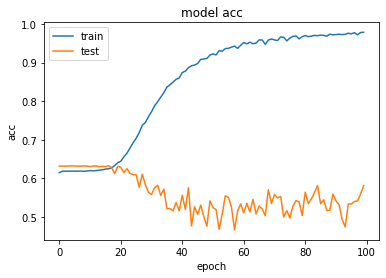

In [0]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
countDatGender = vFeaturedDF['Gender'].value_counts()
countDatNation = vFeaturedDF['Nationality'].value_counts()
countDatCeleb = vFeaturedDF['VGGFace1 ID'].value_counts()
# plt.hist(vFeaturedDF['Gender'])
# plt.show()
print(countDatGender)
print(countDatNation.head(10))
print(countDatCeleb.head(10))

m    17412
f    12316
Name: Gender, dtype: int64
USA            18428
UK              5443
India           1064
Canada          1031
Australia        943
Ireland          457
Norway           453
Germany          277
New Zealand      244
Mexico           151
Name: Nationality, dtype: int64
Rob_Reiner        199
Bob_Barker        136
Stephen_Fry       110
Vince_Gilligan    102
Alan_Alda         100
Louis_C.K.         95
J.J._Abrams        90
Peter_Jackson      90
James_Woods        89
Vidya_Balan        79
Name: VGGFace1 ID, dtype: int64


In [0]:
import collections

In [0]:

#trained_y = (lb.inverse_transform((vFeaturedDF)))
countDatGender_y = collections.Counter(trained_y)
#countDatNation = vFeaturedDF['Nationality'].value_counts()
#countDatCeleb = vFeaturedDF['VGGFace1 ID'].value_counts()
# plt.hist(vFeaturedDF['Gender'])
# plt.show()
print(countDatGender_y)
#print(countDatNation.head(10))
#print(countDatCeleb.head(10))

NotFittedError: ignored

In [0]:
# Save model and weights
model_name = 'Celebrity_Nation_Model_epochs100_batch50_adam_lbbefore.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_celeb_update_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /content/saved_models/Celebrity_Nation_Model_epochs100_batch50_adam_lbbefore.h5 


In [0]:
# loading json and model architecture 
json_file = open('model_celeb_update_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Celebrity_Nation_Model_epochs100_batch50_adam_lbbefore.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 58.09%


In [0]:
print(max(model_history.history['val_acc'])*100)

63.23578962764874


In [0]:
preds = loaded_model.predict(x_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

2973/2973 [==============================] - 2s 604us/step


array([1168,  366,  900, ...,  878,   57,  729])

In [0]:
preds = preds.astype(int)
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test#.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[:]


#print(y_test.argmax(axis=1))
#finalY_test = y_test.argmax(axis=1)
predictedClassLabels = []
actualClassLabels = []
for index, i in enumerate(preds['predictedvalues']):
    predictedClassLabels.append(TransformedClassLabels[i])
    actualClassLabels.append(TransformedClassLabels[i])
 
#print(predictedClassLabels)
#print(actualClassLabels)
data = [predictedClassLabels, actualClassLabels]
print(data[0])
print(data[1])
finaldf = pd.DataFrame(data, columns=['Predicted Class Labels', "Actual Class Labels"])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: ignored